In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/face-mask-dataset


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
     

In [4]:
with_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']
['with_mask_502.jpg', 'with_mask_110.jpg', 'with_mask_3205.jpg', 'with_mask_1863.jpg', 'with_mask_2020.jpg']


In [5]:

without_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']
['without_mask_3215.jpg', 'without_mask_2934.jpg', 'without_mask_2572.jpg', 'without_mask_1906.jpg', 'without_mask_2551.jpg']


In [6]:
print('number of mask images:', len(with_mask_files))
print('number of without mask images:', len(without_mask_files))

number of mask images: 3725
number of without mask images: 3828


**Creating Labels for the two class of images**

with mask --> 1
without mask --> 0

In [7]:
with_mask_label = [1]*3725
without_mask_label = [0]*3828

print(with_mask_label[0:5])

print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [8]:

print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [9]:

labels = with_mask_label + without_mask_label

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


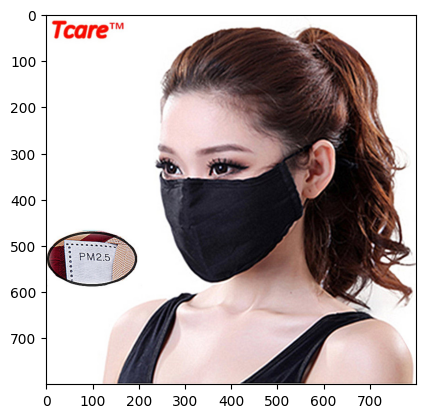

In [16]:
# displaying with mask image

img = mpimg.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_3326.jpg')
imgplot  = plt.imshow(img)
plt.show()
     

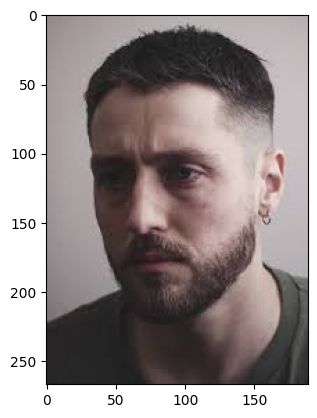

In [13]:
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3414.jpg')
imgplot  = plt.imshow(img)
plt.show()
     

**Image processing**

Resize the images
Convert the images to numpy arrays

In [19]:
# convert images to numpy arrays

with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:

len(data)

7553

In [21]:

type(data)

list

In [22]:

data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]

In [23]:

data[0].shape

(128, 128, 3)

In [24]:

# converting images list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)
type(X)

numpy.ndarray

In [25]:
print(X.shape)

(7553, 128, 128, 3)


In [26]:
print(Y.shape)

(7553,)


In [27]:
print(Y)

[1 1 1 ... 0 0 0]


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# compile the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [33]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 84s 484ms/step - acc: 0.6952 - loss: 0.7328 - val_acc: 0.9025 - val_loss: 0.2480
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 82s 480ms/step - acc: 0.8821 - loss: 0.3048 - val_acc: 0.9107 - val_loss: 0.2044
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 81s 479ms/step - acc: 0.8927 - loss: 0.2717 - val_acc: 0.9306 - val_loss: 0.1691
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 81s 477ms/step - acc: 0.9175 - loss: 0.2044 - val_acc: 0.9405 - val_loss: 0.1751
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 82s 484ms/step - acc: 0.9330 - loss: 0.1742 - val_acc: 0.9372 - val_loss: 0.1505
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 144s 498ms/step - acc: 0.9435 - loss: 0.1385 - val_acc: 0.9471 - val_loss: 0.1576
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 85s 498ms/step - acc: 0.9518 - loss: 0.1252 - val_acc: 0.9388 - val_loss: 0.1693
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 85s 503ms/step - acc: 0.9541 - loss: 0.1258 - val_acc: 0.9455 - val_loss: 0.1505
Epoch 9/10
170/170 ━━━━━━━━━━━━

In [34]:

loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - acc: 0.9252 - loss: 0.3960
Test accuracy = 0.9278623461723328


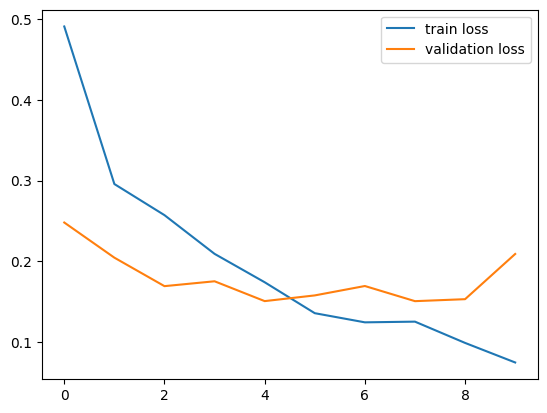

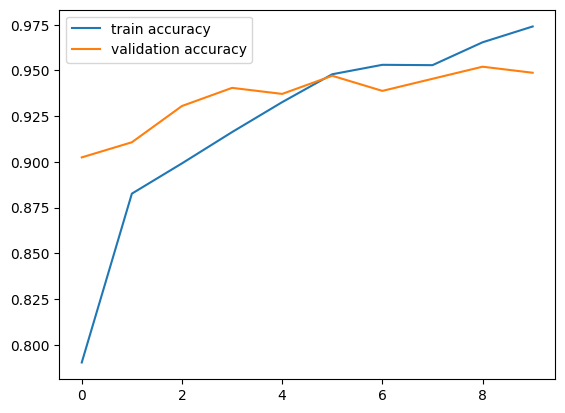

In [35]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted:  /kaggle/input/face-mask-dataset/data/with_mask/with_mask_100.jpg


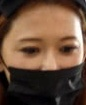

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.47961104 0.5702794 ]]
1
The person in the image is waring a mask.


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is waring a mask.')
else:
  print('The person in the image in not waring a mask')